In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zad

Na podstawie danych food, określić podobieństwo między zwyczajami jedzeniowymi mieszkańców krajów Wielkiej Brytanii.

Dla poniższych danych 

 * znajdż optymalną ilość wymiaów i zredukuj wymiar danyc
 * ponadto zmniejsz wymiar danych do 2 i zwizualizuj dane

In [2]:
import pandas as pd
food = pd.read_csv("data/food.txt",delimiter=" ",comment="#")
food

,food,England,Wales,Scotland,Ireland
0,Cheese,105,103,103,66
1,Carcass-meat,245,227,242,267
2,Other-meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats-and-oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh-potatoes,720,874,566,1033
7,Fresh-Veg,253,265,171,143
8,Other-Veg,488,570,418,355
9,Processed-potatoes,198,203,220,187


In [25]:
X = np.array(food)[:,1:].T.astype("float") # Wiersze to kraje
print(X.shape)
y = food.columns[1:]
print(y)

(4, 17)
Index(['England', 'Wales', 'Scotland', 'Ireland'], dtype='object')


In [6]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,105.0,245.0,685.0,147.0,193.0,156.0,720.0,253.0,488.0,198.0,360.0,1102.0,1472.0,57.0,1374.0,375.0,54.0
1,103.0,227.0,803.0,160.0,235.0,175.0,874.0,265.0,570.0,203.0,365.0,1137.0,1582.0,73.0,1256.0,475.0,64.0
2,103.0,242.0,750.0,122.0,184.0,147.0,566.0,171.0,418.0,220.0,337.0,957.0,1462.0,53.0,1572.0,458.0,62.0
3,66.0,267.0,586.0,93.0,209.0,139.0,1033.0,143.0,355.0,187.0,334.0,674.0,1494.0,47.0,1506.0,135.0,41.0


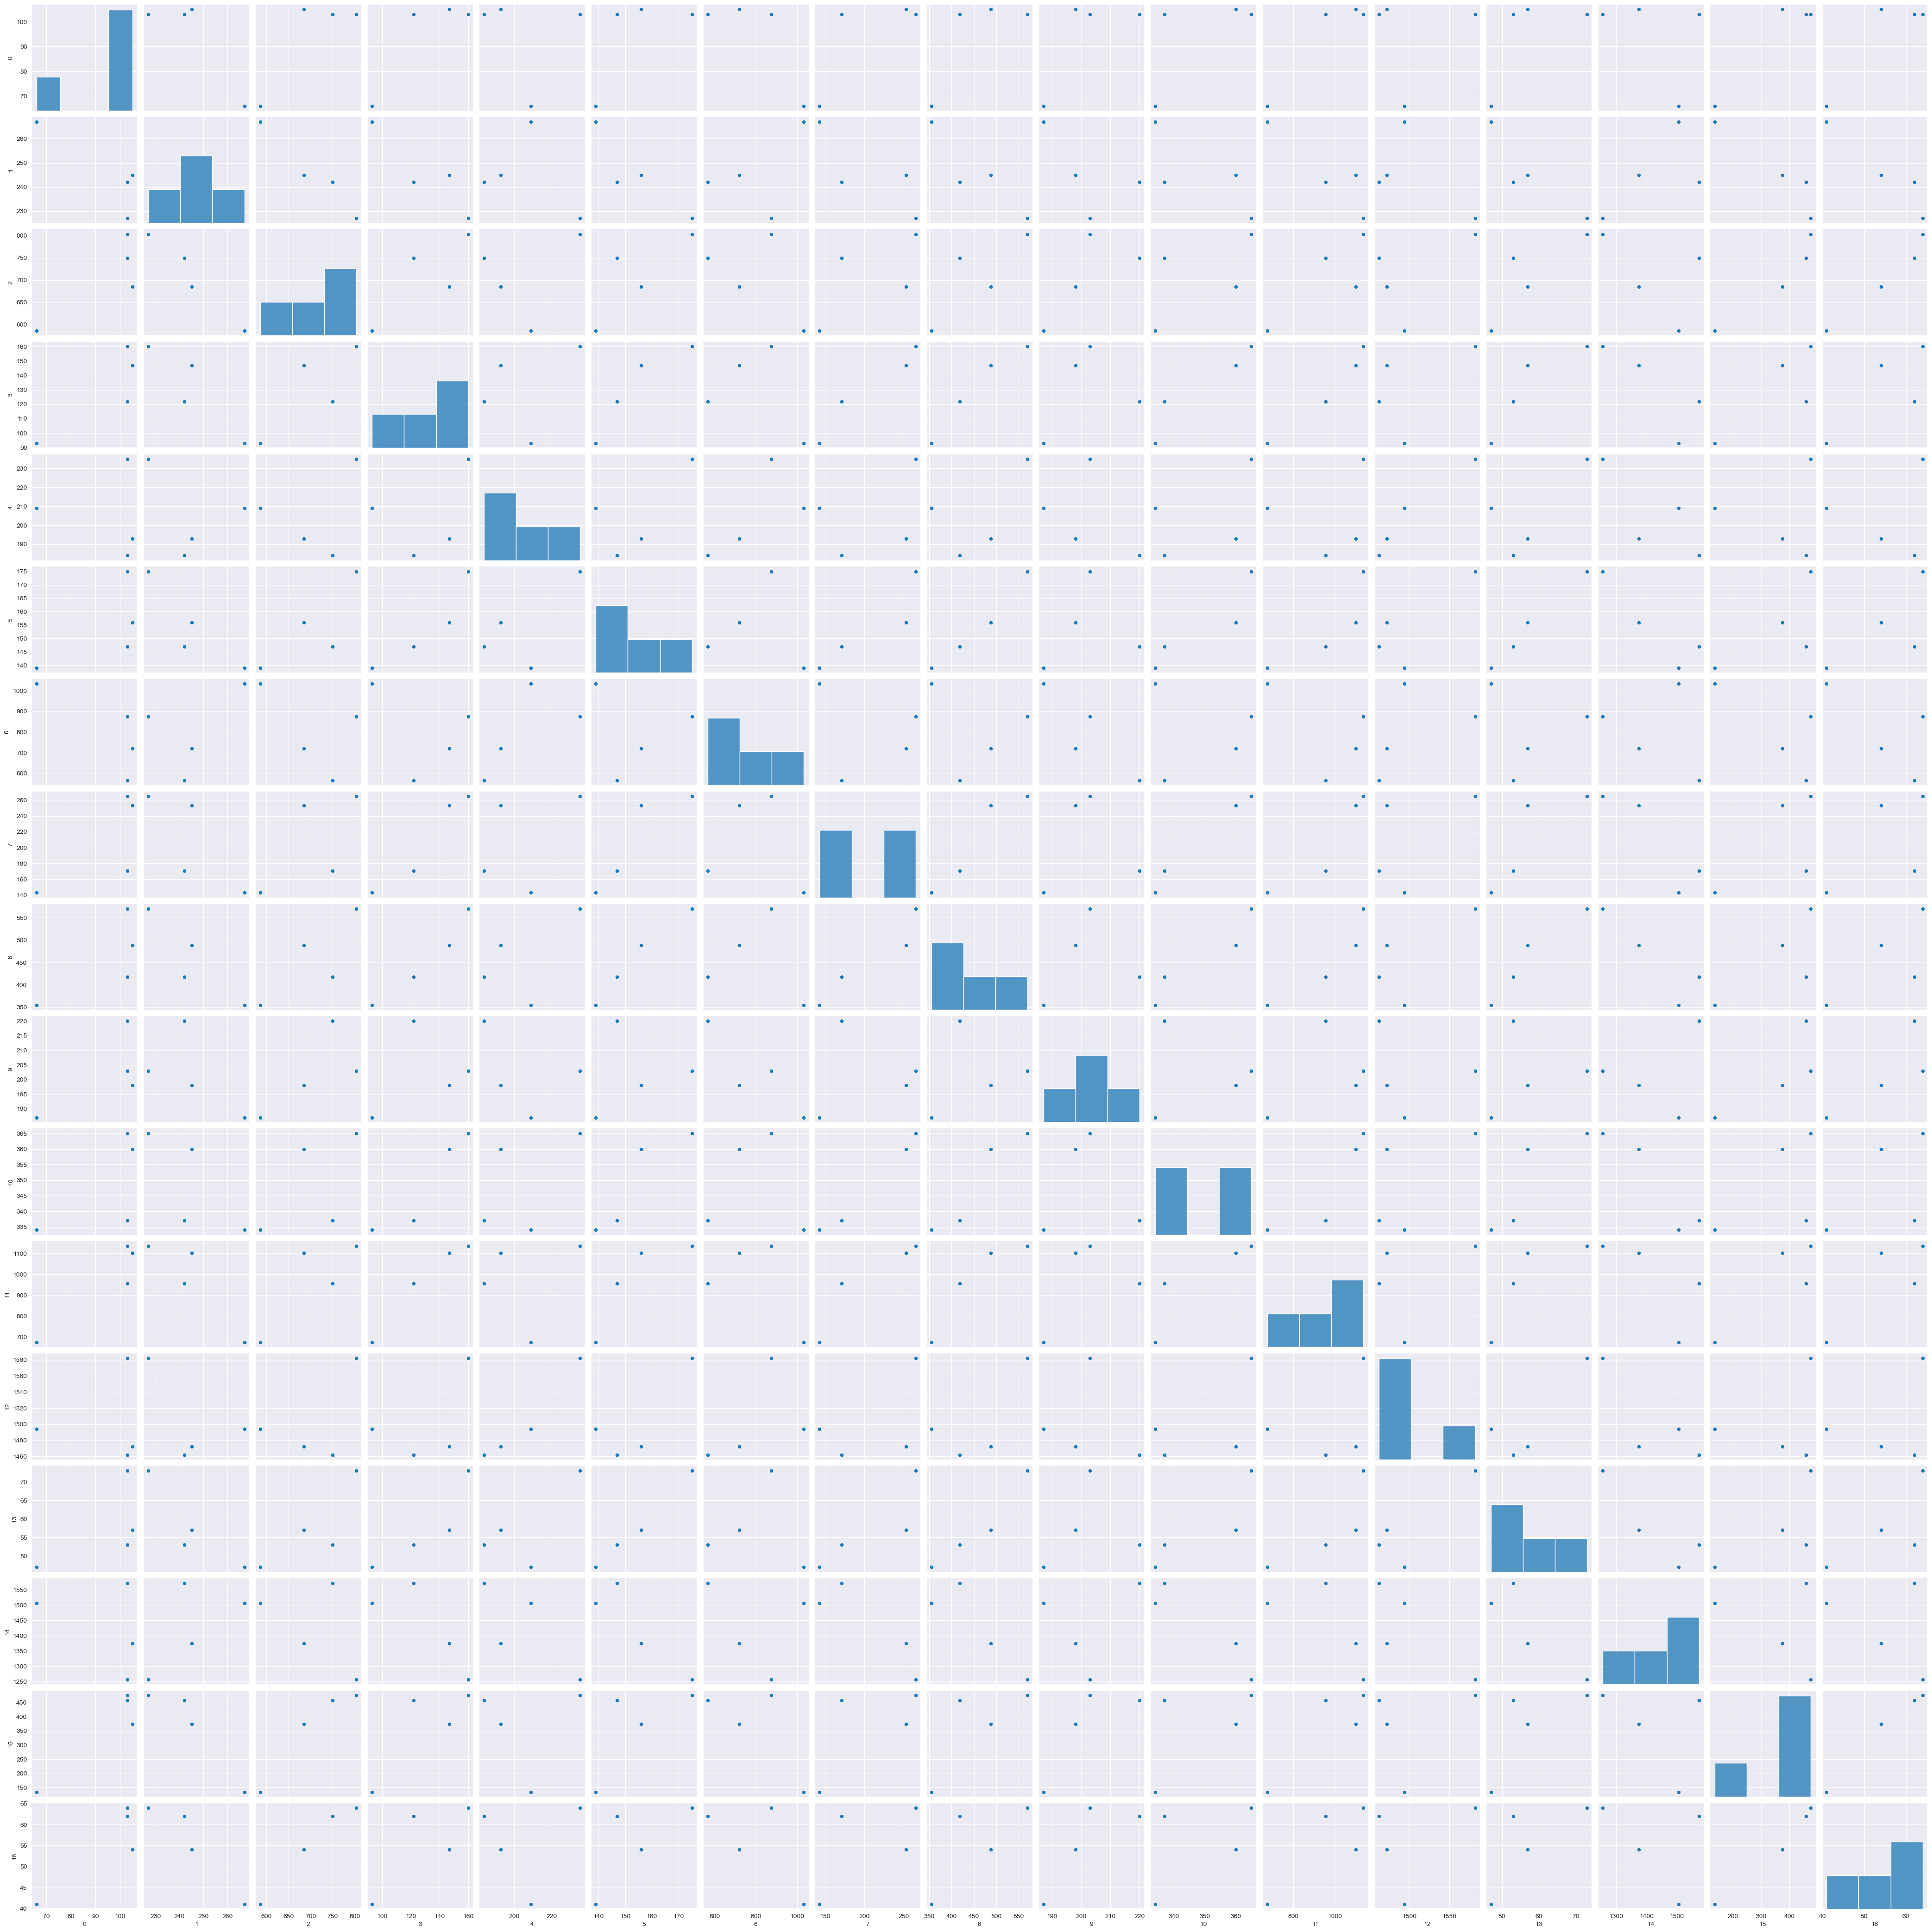

In [7]:
df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.decomposition import PCA

In [16]:
for i in range(17):
    for j in range(17):
        corr_coef = df[i].corr(df[j])
        if i!=j and abs(corr_coef)>0.7:
            print("({:d}, {:d}) {:.2f}".format(i,j,corr_coef))
print(df[0].corr(df[4]))
print(df[0].corr(df[5]))
print(df[4].corr(df[5]))
#0 and 4 stay

(0, 1) -0.86
(0, 2) 0.83
(0, 3) 0.85
(0, 6) -0.78
(0, 7) 0.73
(0, 8) 0.74
(0, 9) 0.70
(0, 11) 0.93
(0, 15) 0.95
(0, 16) 0.89
(1, 0) -0.86
(1, 2) -0.98
(1, 3) -0.91
(1, 5) -0.90
(1, 7) -0.79
(1, 8) -0.91
(1, 10) -0.75
(1, 11) -0.91
(1, 13) -0.90
(1, 15) -0.94
(1, 16) -0.95
(2, 0) 0.83
(2, 1) -0.98
(2, 3) 0.80
(2, 5) 0.80
(2, 8) 0.80
(2, 9) 0.72
(2, 11) 0.82
(2, 13) 0.83
(2, 15) 0.96
(2, 16) 0.99
(3, 0) 0.85
(3, 1) -0.91
(3, 2) 0.80
(3, 5) 0.93
(3, 7) 0.97
(3, 8) 0.98
(3, 10) 0.94
(3, 11) 0.98
(3, 13) 0.89
(3, 14) -0.81
(3, 15) 0.81
(3, 16) 0.77
(4, 12) 0.97
(4, 13) 0.70
(4, 14) -0.77
(5, 1) -0.90
(5, 2) 0.80
(5, 3) 0.93
(5, 7) 0.90
(5, 8) 0.99
(5, 10) 0.91
(5, 11) 0.85
(5, 12) 0.80
(5, 13) 0.99
(5, 14) -0.90
(5, 15) 0.71
(5, 16) 0.72
(6, 0) -0.78
(6, 9) -0.88
(6, 15) -0.72
(7, 0) 0.73
(7, 1) -0.79
(7, 3) 0.97
(7, 5) 0.90
(7, 8) 0.95
(7, 10) 0.99
(7, 11) 0.93
(7, 13) 0.85
(7, 14) -0.89
(8, 0) 0.74
(8, 1) -0.91
(8, 2) 0.80
(8, 3) 0.98
(8, 5) 0.99
(8, 7) 0.95
(8, 10) 0.95
(8, 11) 0.92
(8, 

## Odpowiedź: 2 wymiary są wystarczające

# Zad
Zwizualizuj dane w 2D

In [29]:
pca_model = PCA(n_components=2)
std_data = StandardScaler().fit_transform(X)
res = pca_model.fit_transform(std_data)
df = pd.DataFrame(res)
display(df)

,0,1
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


,0,1,country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,Ireland


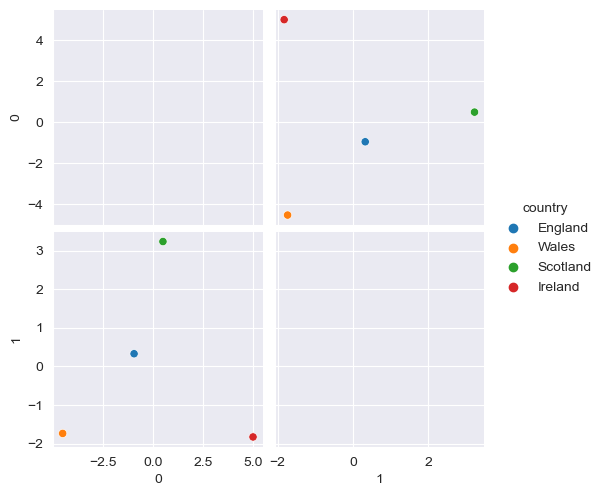

In [38]:
df['country']=y
display(df)
sns.pairplot(df, hue='country')
plt.show()